In [2]:
!pip install -q tensorflow-model-optimization
!pip install tensorflow
!pip install umap-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.20.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



^C


In [47]:
import numpy as np
import pandas as pd
import tempfile
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statistics import variance 
import umap

In [3]:
df = pd.read_excel('unnamed_attrs.xlsx')
print(df)

      Фактическая дата по рапорту Время по рапорту  Номер файла (FFID)  \
0                         4/24/19         17:32:22                   6   
1                         4/24/19         17:36:30                   7   
2                         4/24/19         17:39:14                   8   
3                         4/24/19         17:41:49                   9   
4                         4/24/19         17:44:21                  10   
...                           ...              ...                 ...   
60565         2020-08-05 00:00:00         03:32:49              220036   
60566         2020-08-05 00:00:00         03:38:19              220043   
60567         2020-08-05 00:00:00         03:41:41              220050   
60568         2020-08-05 00:00:00         03:44:56              220057   
60569         2020-08-05 00:00:00         03:48:14              220064   

       Номер профиля  Номер пикета  Превышения Z, м  Количество накоплений  \
0               2605          588

In [4]:
X = np.array(df[['Координата X,м']])
Y = np.array(df[['Координата Y,м']])
SN = np.array(df[['Соотношение Signal/Noise']])

In [5]:
SN = df['Соотношение Signal/Noise'].values
Z = df['Превышения Z, м'].values
DOM = df['Доминантная частота'].values
MIC = df['медианная амплитуда микросейсм, мВ'].values
SIG = df['медианная амплитуда сигнала, мВ'].values

In [6]:
SNR_clip = SN.copy()
SNR_clip[SNR_clip<2] = 2
SNR_clip[SNR_clip>15] = 15
SNR_norm = ((SNR_clip - SNR_clip.mean())/SNR_clip.std())
Z_clip = Z.copy()
Z_clip[Z_clip<20] = 20
Z_clip[Z_clip>90] = 90
Z_norm = ((Z_clip - Z_clip.mean())/Z.std())
DOM_clip = DOM.copy()
DOM_clip[DOM_clip<13] = 13
DOM_clip[DOM_clip>25] = 25
DOM_norm = ((DOM_clip - DOM_clip.mean())/DOM_clip.std())
MIC_clip = MIC.copy()
MIC_clip[MIC_clip<0] = 0
MIC_clip[MIC_clip>15] = 15
MIC_norm = ((MIC_clip - MIC_clip.mean())/MIC_clip.std())
SIG_clip = SIG.copy()
SIG_clip[SIG_clip<15] = 15
SIG_clip[SIG_clip>65] = 65
SIG_norm = ((SIG_clip - SIG_clip.mean())/SIG_clip.std())

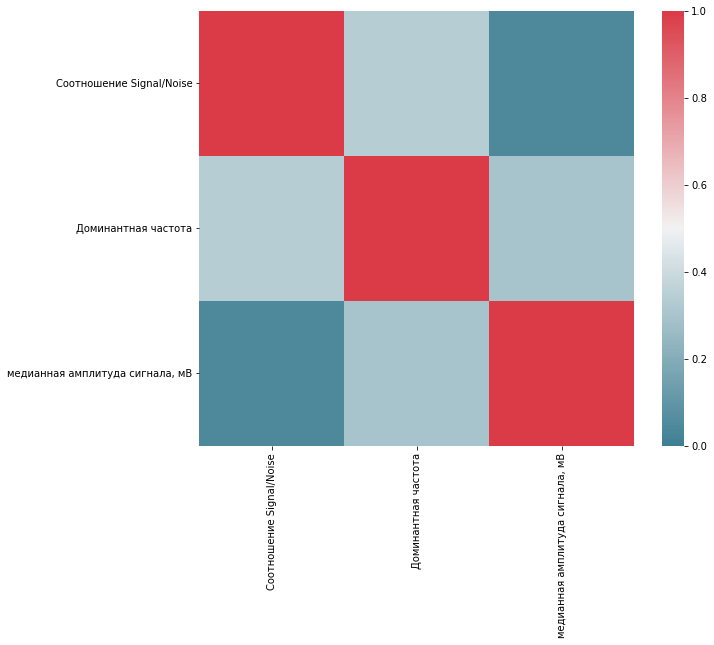

In [7]:
data = np.array([SNR_norm, DOM_norm, SIG_norm]).T
df_attr = pd.DataFrame(data=data, columns= ['Соотношение Signal/Noise', 'Доминантная частота', 'медианная амплитуда сигнала, мВ'])
f, ax = plt.subplots(figsize=(10, 8))
corr = df_attr.corr()
sns.heatmap(np.abs(corr),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=0.0, vmax=1.0,
            square=True, ax=ax)

plt.show()

In [10]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(df_attr)
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(df_attr)
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df_attr)

KMeans(n_clusters=4)

In [12]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_attr)
print(pca_data)

[[-3.10336056  1.19733447]
 [-2.87864024  0.82237151]
 [-2.92537404  0.71065127]
 ...
 [ 2.24089582  0.18258135]
 [ 1.7937602  -0.1113993 ]
 [ 2.09030471  0.14042352]]


In [13]:
kmeans_pca_2 = KMeans(n_clusters=2)
kmeans_pca_2.fit(pca_data)
kmeans_pca_3 = KMeans(n_clusters=3)
kmeans_pca_3.fit(pca_data)
kmeans_pca_4 = KMeans(n_clusters=4)
kmeans_pca_4.fit(pca_data)

KMeans(n_clusters=4)

In [14]:
!pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=70560171470a46583412eafec6ee0793175d89c75cc7bd28252da218650f7a99
  Stored in directory: c:\users\назар\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55639 sha256=08ee31432d250ac77db36e41141f3e4ca8e39ebeb9cc53fc45106498a92e4381
  Stored in directory: c:\users\назар\appdata\local\pip\cache\wheels\12\f9\4d\ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent


In [15]:
import umap

In [16]:
reducer = umap.UMAP(2)
embedding = reducer.fit_transform(df_attr)

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed!

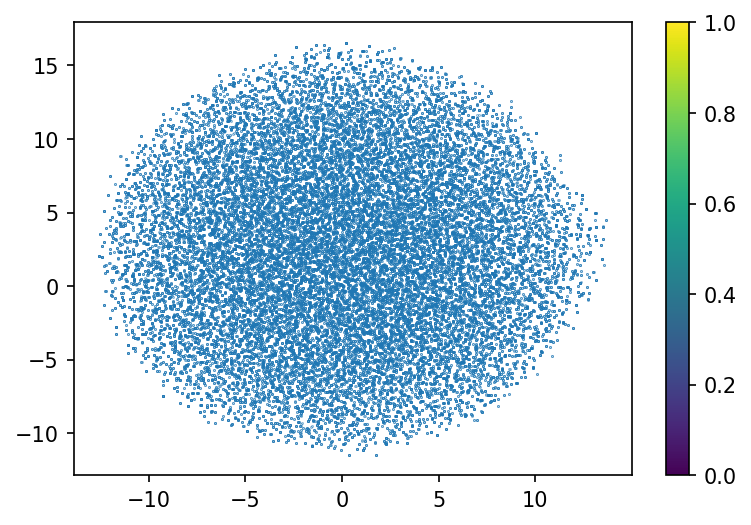

In [17]:
fig = plt.figure(dpi = 150)
plt.scatter(embedding[:, 0], embedding[:, 1], s = 0.05, cmap = 'turbo')
plt.colorbar()

In [18]:
kmeans_2_embedding = KMeans(n_clusters=2)
kmeans_2_embedding.fit(embedding)
kmeans_3_embedding = KMeans(n_clusters=3)
kmeans_3_embedding.fit(embedding)
kmeans_4_embedding = KMeans(n_clusters=4)
kmeans_4_embedding.fit(embedding)

KMeans(n_clusters=4)

C:\Users\5B34~1\AppData\Local\Temp/ipykernel_24060/292970943.py:7: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im_0)
C:\Users\5B34~1\AppData\Local\Temp/ipykernel_24060/292970943.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im_1)


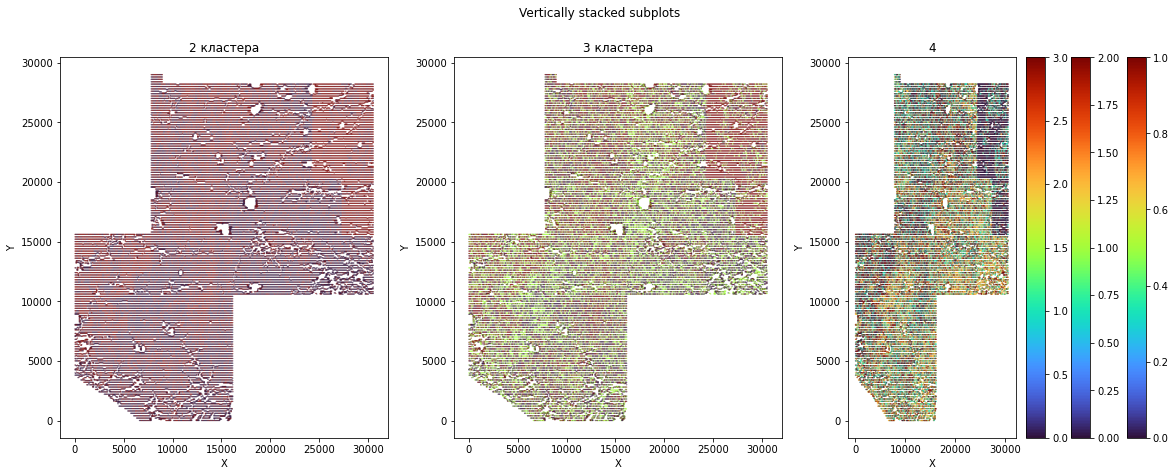

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Vertically stacked subplots')
im_0 = axs[0].scatter(X, Y, c = kmeans_2_embedding.labels_, s = 0.05, cmap = 'turbo')
axs[0].set_title('2 кластера')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
plt.colorbar(im_0)
im_1 = axs[1].scatter(X, Y, c = kmeans_3_embedding.labels_, s = 0.05, cmap = 'turbo')
axs[1].set_title('3 кластера')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
plt.colorbar(im_1)
im_2 = axs[2].scatter(X, Y, c = kmeans_4_embedding.labels_, s = 0.05, cmap = 'turbo')
axs[2].set_title('4')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
plt.colorbar(im_2)

In [98]:
def normalization(data):
    return ((data - data.mean())/data.std())

In [128]:
def cleaning(data):
    column_name = data.columns
    i = 0
    for column in column_name:
        if i == 0:
            df_filtered = data.loc[(data[column] >= (data[column].mean() - 3 * data[column].std())) &
                               (data[column] <= (data[column].mean() + 3 * data[column].std()))]
            i+=1
        else:
            df_filtered = df_filtered.loc[(df_filtered[column] >= (df_filtered[column].mean() - 3 * df_filtered[column].std()))
                                        & (df_filtered[column] <= (df_filtered[column].mean() + 3 * df_filtered[column].std()))]
    df_filtered = df_filtered.reset_index(drop = 'True')
    return df_filtered

In [131]:
def data_preparation(data):
    data = cleaning(data)
    column_name = data.columns
    for column in column_name:
        normalization(data[column])
    return data

In [188]:
def gistograms(data):
    size = len(data.columns)
    column_name = data.columns
    fig, axs = plt.subplots(size, figsize=(10, 30))
    fig.suptitle('Vertically stacked subplots')
    i = 0
    for column in column_name:
        axs[i].hist(data[column], bins=30)
        i+=1
    plt.show()

In [210]:
def cards(data):
    X = data['Координата X,м']
    Y = data['Координата Y,м']
    column_name = data.columns
    fig, axs = plt.subplots(len(data.columns)-2, figsize=(10, 50))
    fig.suptitle('Cards')
    i = 0
    for column in column_name:
        if (column != 'Координата X,м') & (column != 'Координата Y,м'):
            im = axs[i].scatter(X, Y, c = data[column], s = 0.05, cmap = 'turbo')
            axs[i].set_title(column)
            axs[i].set_xlabel('X')
            axs[i].set_ylabel('Y')
            plt.colorbar(im)
            i+=1
    plt.show()

In [202]:
def cor_matrix(data):
    f, ax = plt.subplots(dpi = 150)
    corr = data.corr()
    sns.heatmap(np.abs(corr),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=0.0, vmax=1.0,
            square=True, ax=ax)
    plt.show()

In [178]:
def clasters(data, klasster_size):
    kmeans = KMeans(n_clusters = klasster_size)
    kmeans.fit(data)
    return kmeans 

In [179]:
def pca(data, size_components):
    pca = PCA(n_components = size_components)
    pca_data = pca.fit_transform(data)
    return pca_data

In [180]:
def classter_labels(data, classter):
    fig = plt.figure(figsize=(20, 7))
    plt.suptitle('Classters')
    X = data['Координата X,м']
    Y = data['Координата Y,м']
    plt.scatter(X, Y, c = classter.labels_, s = 0.05, cmap = 'turbo')
    plt.title('класстер')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()


In [190]:
def pca_classter_labels(data, classter):
    fig = plt.figure(figsize=(20, 7))
    plt.suptitle('Classters')
    X = data['Координата X,м']
    Y = data['Координата Y,м']
    plt.scatter(X, Y, c = classter.labels_, s = 0.05, cmap = 'turbo')
    plt.title('pca_класстер')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

In [181]:
def umap_classter(data, size):
    reducer = umap.UMAP(size)
    embedding = reducer.fit_transform(data)

In [182]:
def read_file(path):
    df = pd.read_excel(path)
    return df

In [191]:
def code(data, classter_size, pca_size):
    data_preparation(data)
    gistograms(data)
    cards(data)
    cor_matrix(data)
    cl_2 = clasters(data, classter_size)
    pca_2 = pca(data, pca_size)
    cl_pca_2 = clasters(pca_2, classter_size)
    pca_classter_labels(data, cl_pca_2)
    classter_labels(data, cl_2)

In [113]:
path = 'unnamed_attrs.xlsx'
df = read_file(path)
print(df.shape)

(60570, 16)


In [192]:
df_attr = df[['Превышения Z, м',
       'Количество накоплений', 'COG, м',
       'Доминантная частота', 'медианная амплитуда микросейсм, мВ',
       'медианная амплитуда сигнала, мВ', 'Соотношение Signal/Noise', 'Координата X,м', 'Координата Y,м']]

In [132]:
df_attr = data_preparation(df_attr)
print(df_attr.shape)

(56279, 9)


C:\Users\5B34~1\AppData\Local\Temp/ipykernel_86512/2228741688.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


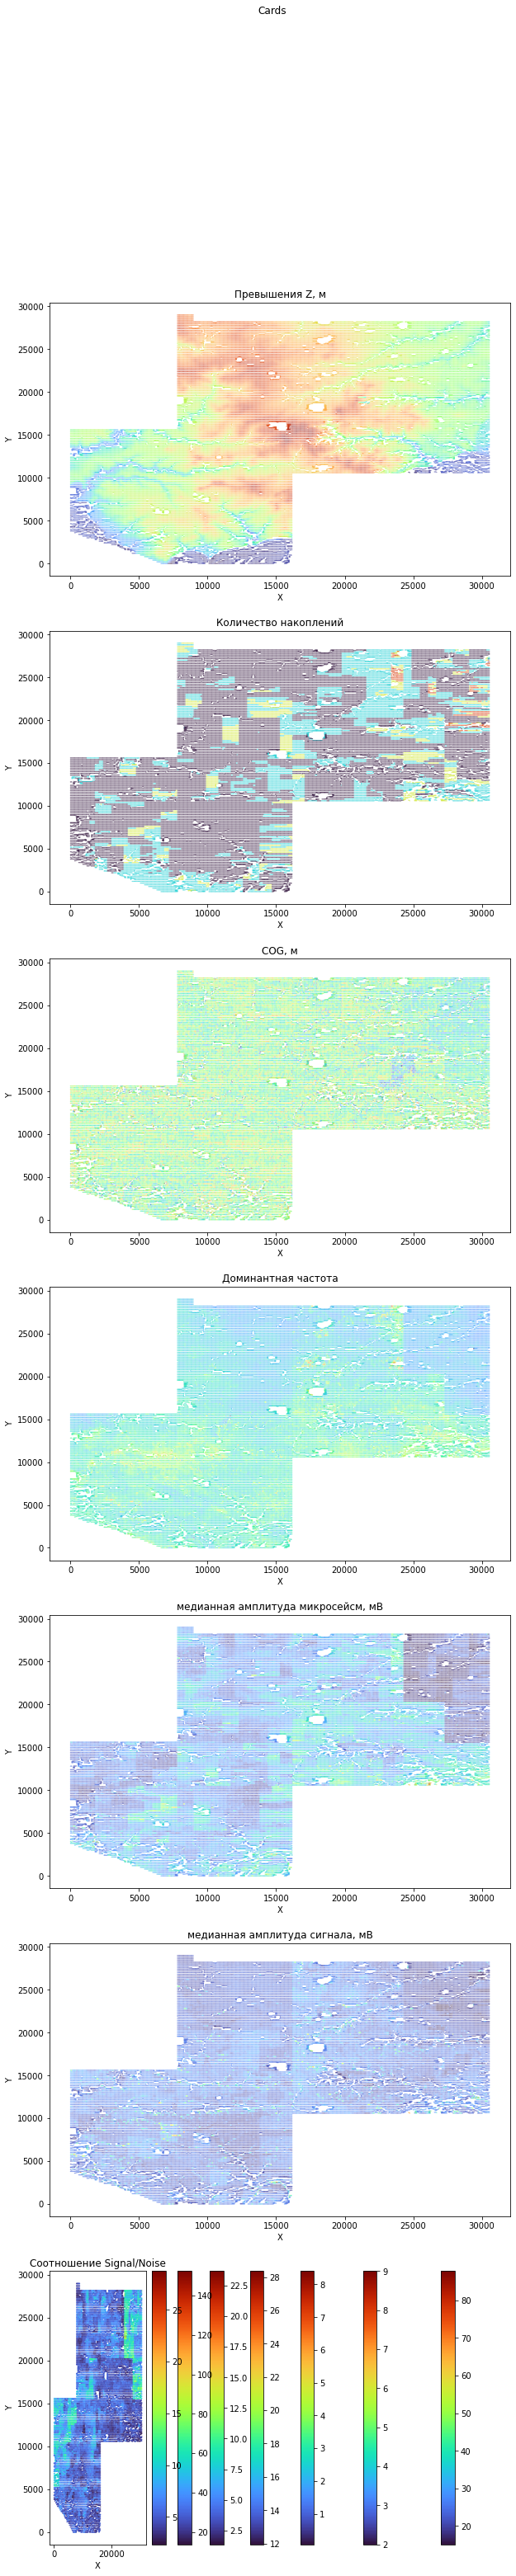

In [211]:
cards(df_attr)

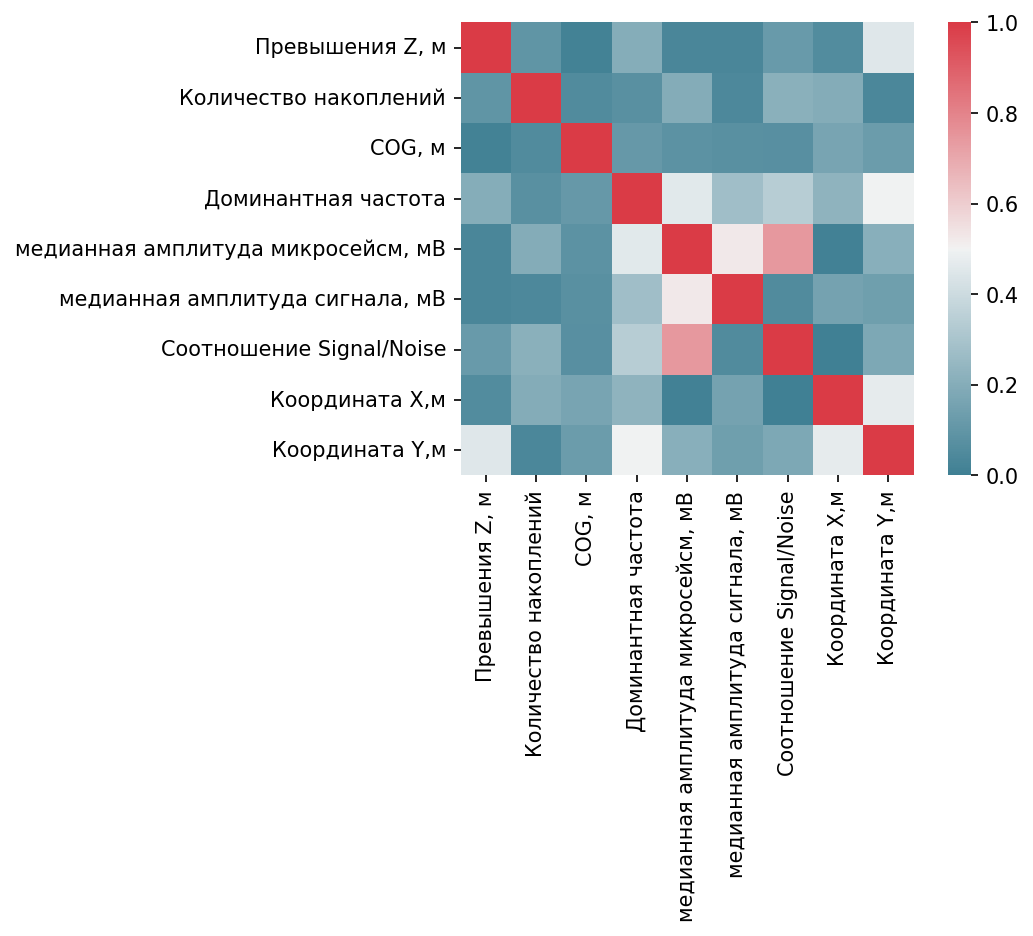

In [205]:
cor_matrix(df_attr)

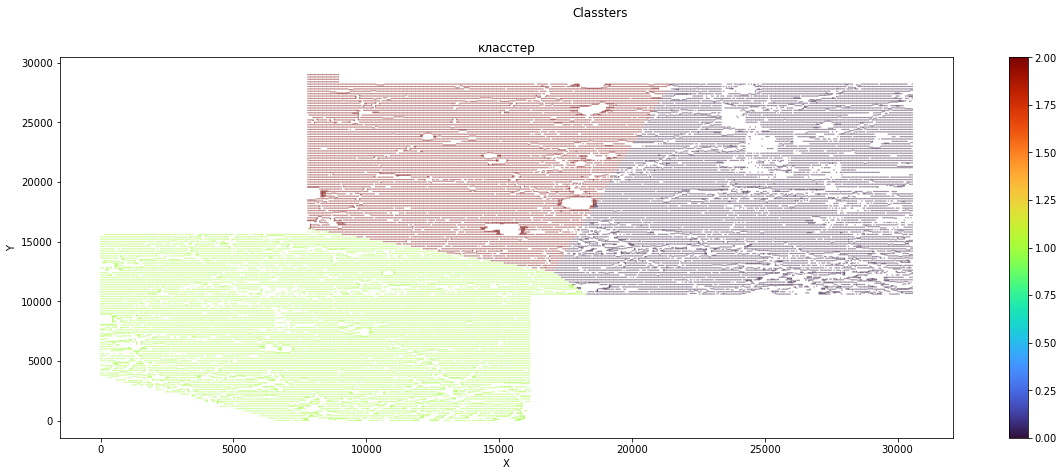

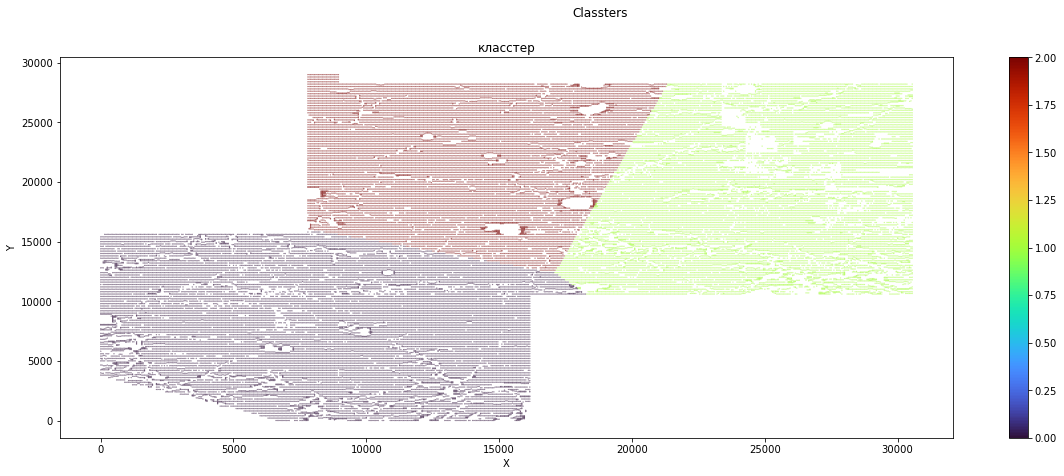

In [185]:
cl_2 = clasters(df_attr, 3)
pca_2 = pca(df_attr, 2)
cl_pca_2 = clasters(pca_2, 3)
classter_labels(df_attr, cl_pca_2)
classter_labels(df_attr, cl_2)

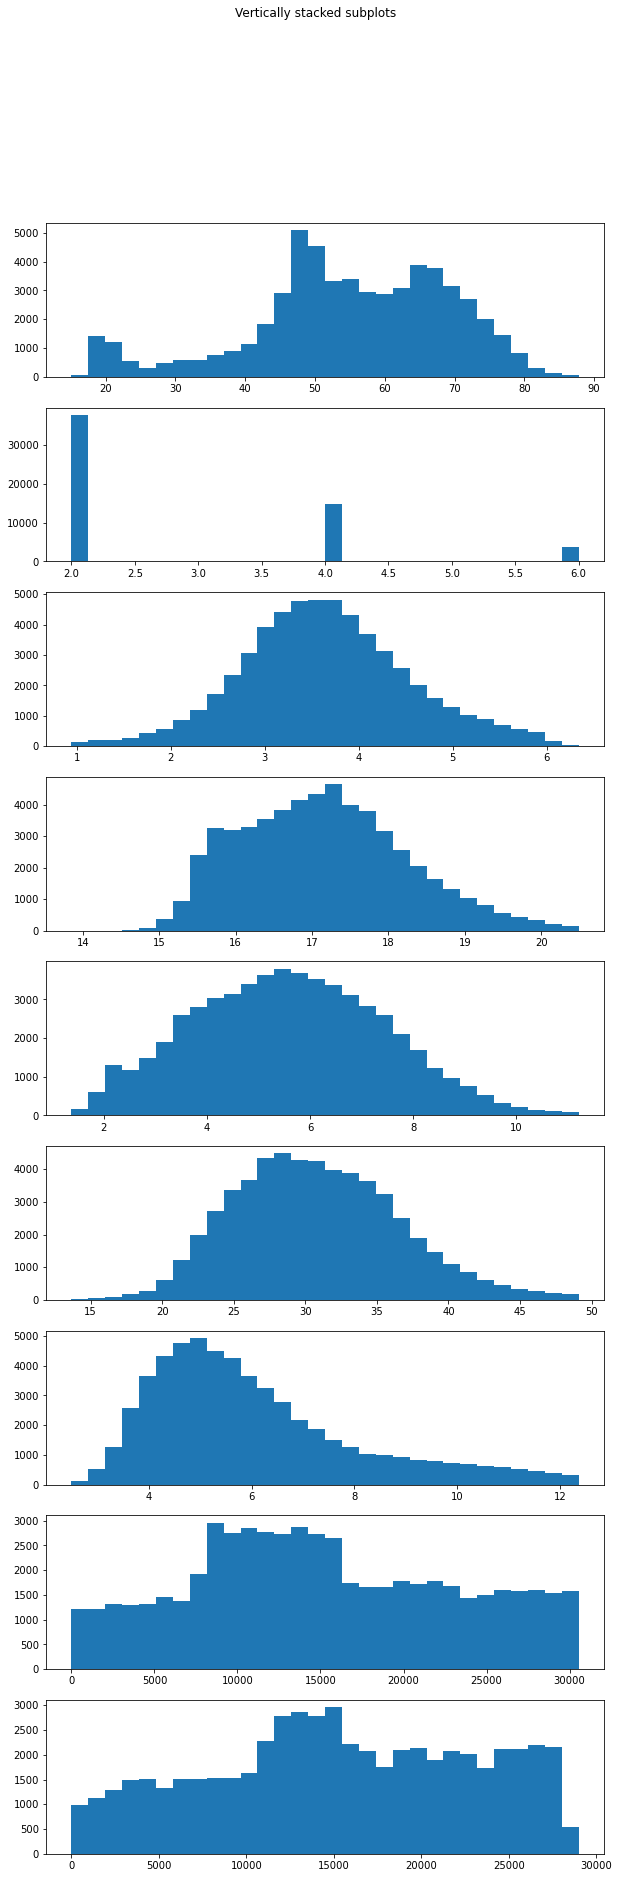

In [189]:
gistograms(df_attr)

In [126]:
column_name = df_attr.columns
column = 'Соотношение Signal/Noise'
# print(df_attr.loc[(df_attr[column] >= (df_attr[column].mean() - 3 * df_attr[column].std())) &
#                                (df_attr[column] <= (df_attr[column].mean() + 3 * df_attr[column].std()))])
print(1)
# for column in column_name:
# #     a = df_attr[column].mean() - 3 * df_attr[column].std()
# #     print(a)
# #     print(df_attr[(df_attr[column] >= (df_attr[column].mean() - 3 * df_attr[column].std()))])
#     print(df_attr[column].mean() - 3 * df_attr[column].std())

1


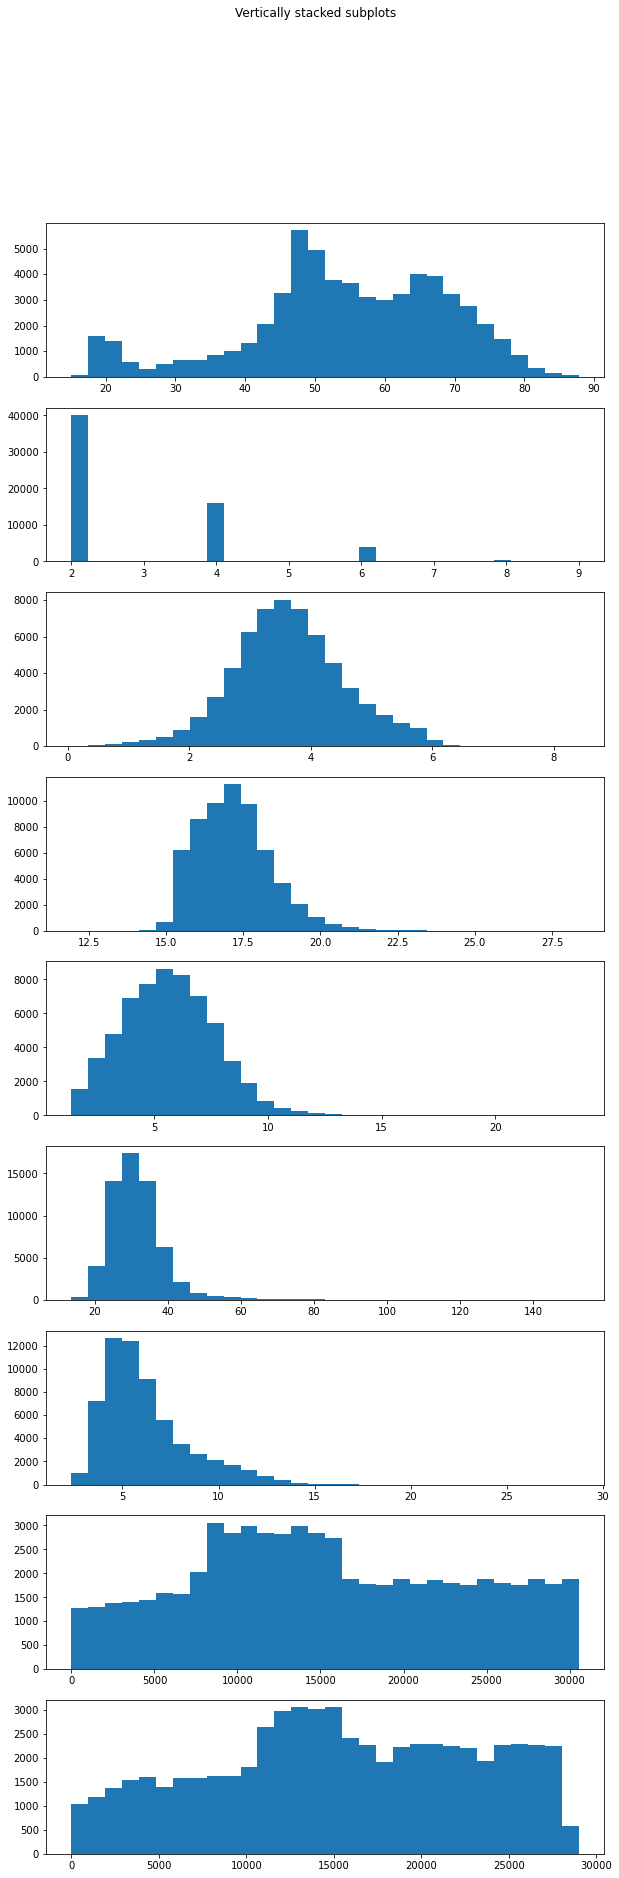

C:\Users\5B34~1\AppData\Local\Temp/ipykernel_86512/2228741688.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


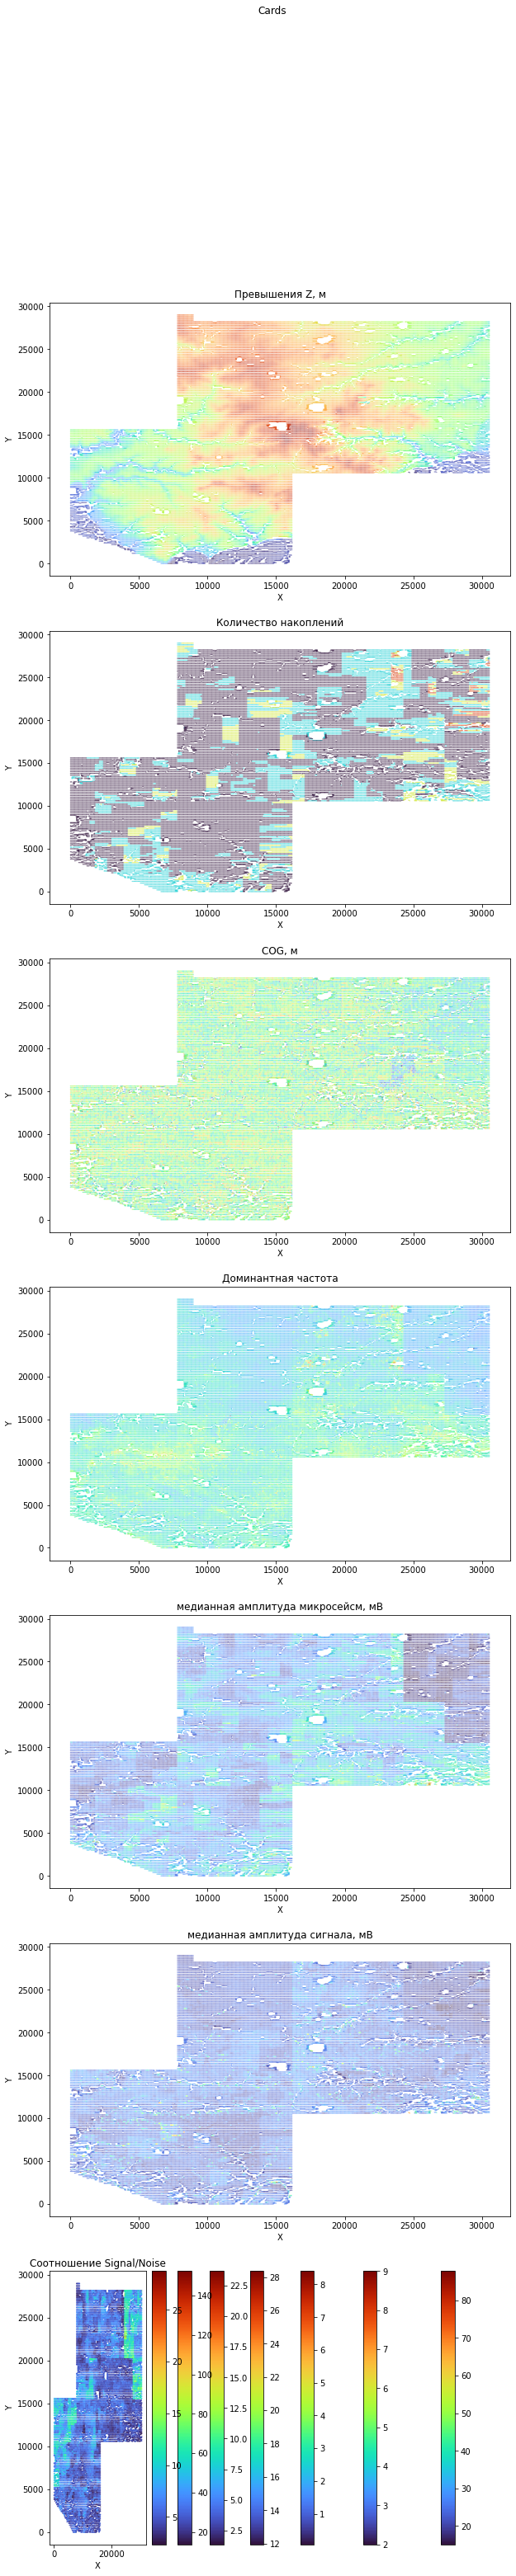

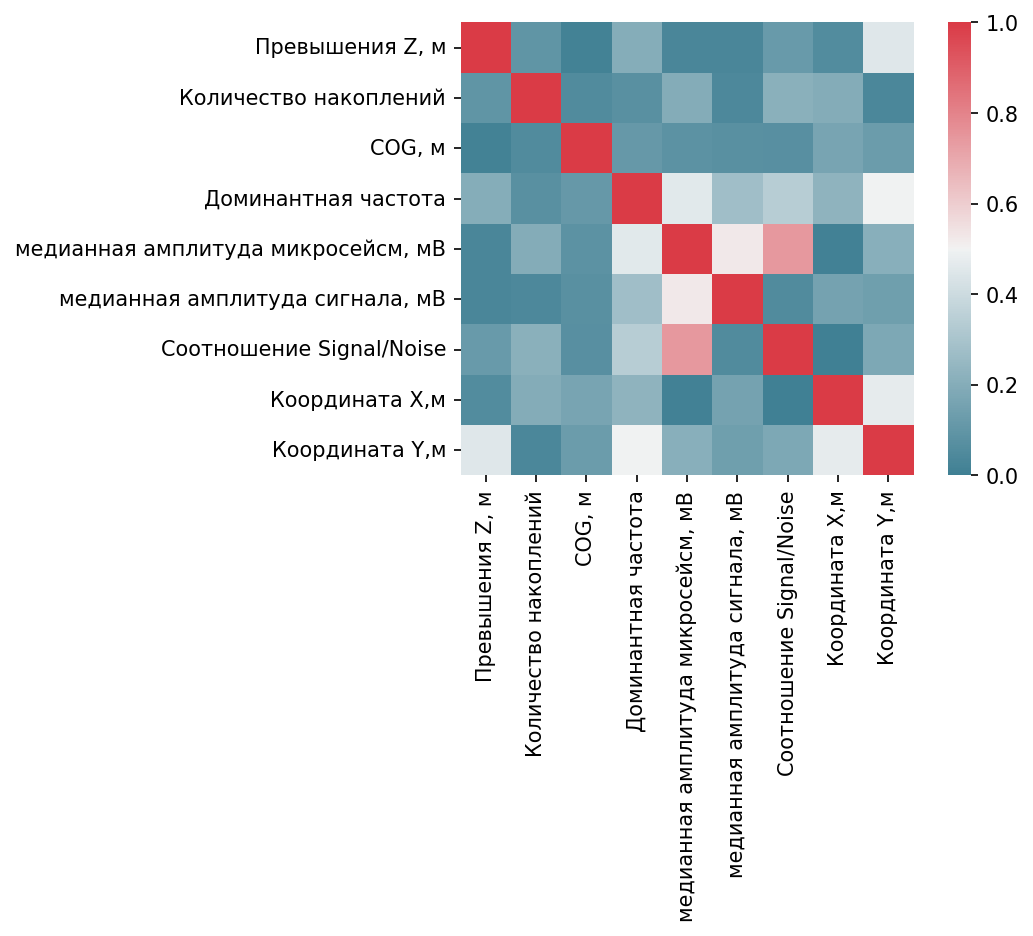

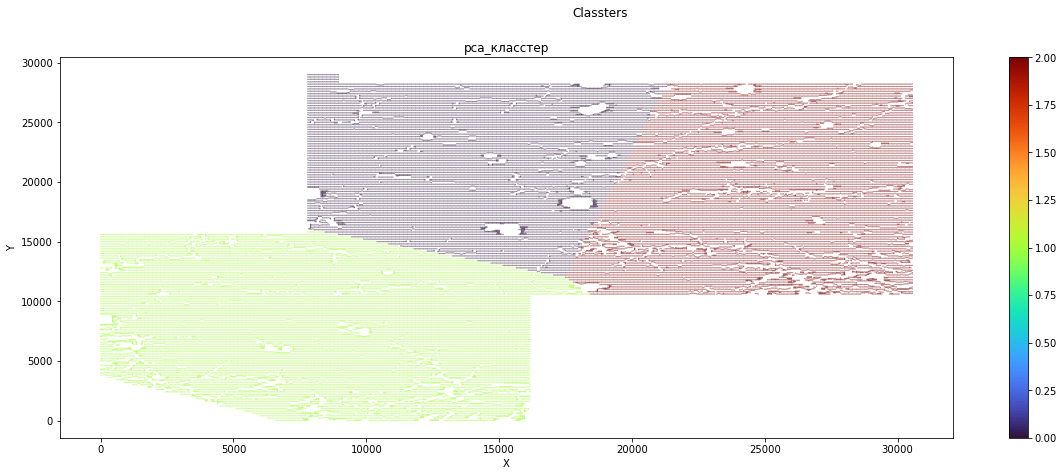

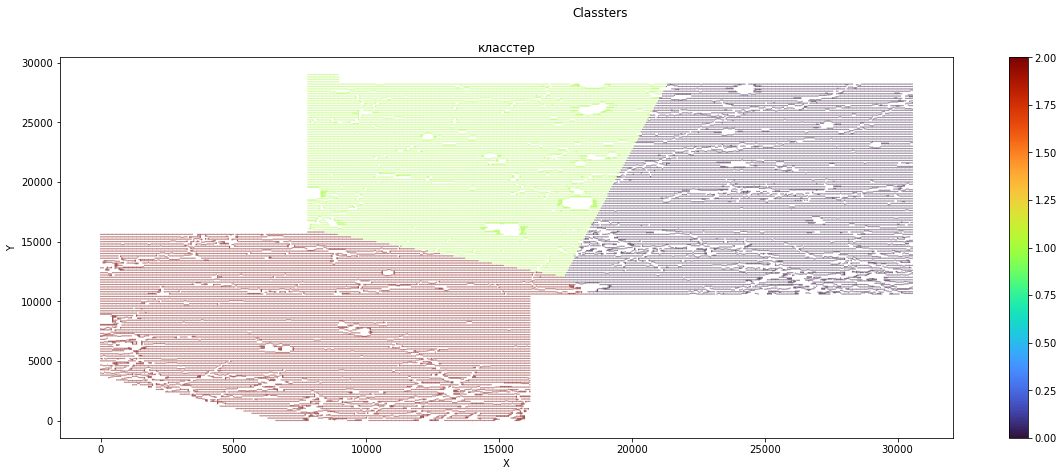

In [212]:
code(df_attr, 3, 2)